In [1]:
import pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_conv

# basic info

In [2]:
df = pd.read_csv('./repair2.csv')
print(pd.DataFrame(df['RepairCode']).value_counts())
print(pd.DataFrame(df['RepairType']).value_counts())
print(pd.DataFrame(df['contact']).value_counts())
print(pd.DataFrame(df['RepairOK']).value_counts())


RepairCode
1.0           550
2.0           224
3.0            94
4.0            59
dtype: int64
RepairType
P             439
E             370
B             118
dtype: int64
contact 
Phone       270
Web         265
Personal    240
Letter      225
dtype: int64
RepairOK
True        1854
dtype: int64


In [3]:
df

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-01-08,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,2020-01-10,11:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,0:16
13258,25,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,7:48
13259,762,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,11:53
13260,12,InternRepair,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,18:10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


# 제거데이터

- RepairOK 기록이 없는 caseID 데이터 분리 tp/repNO
- contact 기록이 없는 caseID 
- 시간이 없는 데이터 


In [5]:
df = pd.read_csv('./repair2.csv')
tp = df[df['RepairOK'] == True]
tp.sort_values('caseID')
using_case = list(tp[tp['taskID'] == 'RepairReady']['caseID'].sort_values())

In [6]:
# repOK case
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = df
# dataframe = pd.read_csv('./repair2.csv')

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    # dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    # merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = dataframe.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
#     if len(change) == 1:
#         continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
5903,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23,0:00
4035,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02,8:11
4561,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
5098,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:11
9171,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,18:34
8698,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,14:34
2987,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25
3604,1000,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20,2:25


In [7]:
# repairNonOK data
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

repNO = pd.DataFrame()
dataframe = df

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i not in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    # merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = dataframe.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
#     if len(change) == 1:
#         continue
    
    repNO = pd.concat([repNO,merterial])
repNO

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
4568,6,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,2:29
13019,6,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,2:29
990,7,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,9:21
11385,7,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,9:21
1325,13,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,12:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11879,918,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,20:52
1362,942,FirstContact,Monica,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,13:14
4020,942,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,13:14
4334,966,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-06,2:35


In [8]:
repNO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 4568 to 9269
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               146 non-null    int64  
 1   taskID               146 non-null    object 
 2   originator           146 non-null    object 
 3   eventtype            146 non-null    object 
 4   contact              73 non-null     object 
 5   RepairType           0 non-null      object 
 6   objectKey            0 non-null      float64
 7   RepairInternally     0 non-null      object 
 8   EstimatedRepairTime  0 non-null      float64
 9   RepairCode           0 non-null      float64
 10  RepairOK             0 non-null      object 
 11  date                 146 non-null    object 
 12  time                 146 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 16.0+ KB


In [9]:
repNO['taskID'].value_counts()

InformClientWrongPlace    73
FirstContact              73
Name: taskID, dtype: int64

In [10]:
# date, time 결합
tp = tp.sort_values(['date','time'])[:-13] # 시간이없는경우 제거
tp = tp.reset_index().drop('index',axis=1)

In [11]:
col = [f"{tp.loc[i,'date']} {tp.loc[i,'time']}" for i in range(len(tp))]
tp = tp.drop('date',axis=1)
tp = tp.drop('time',axis=1)
tp['date'] = col

In [12]:
tp['date'] = pd.to_datetime(tp['date'])

In [13]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13103 entries, 0 to 13102
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               13103 non-null  int64         
 1   taskID               13101 non-null  object        
 2   originator           13101 non-null  object        
 3   eventtype            13099 non-null  object        
 4   contact              926 non-null    object        
 5   RepairType           927 non-null    object        
 6   objectKey            927 non-null    float64       
 7   RepairInternally     927 non-null    object        
 8   EstimatedRepairTime  927 non-null    float64       
 9   RepairCode           927 non-null    float64       
 10  RepairOK             1850 non-null   object        
 11  date                 13103 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.2+ MB


<AxesSubplot:>

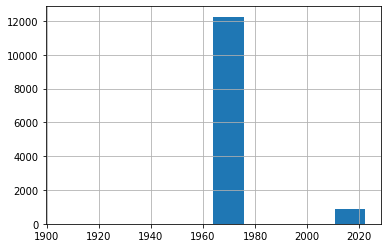

In [14]:
# 날짜 제거 
tp['date'].hist()

In [15]:
tp = tp[tp['date'] > '1940-01-01']
tp = tp[tp['date'] < '2000-01-01']
tp # log data settingㅠㅠ

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date
6,295,FirstContact,Monica,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00
7,556,Survey,Cindy,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1970-01-01 10:00:00
8,556,InternRepair,Paul,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:00:00
9,502,FirstContact,Monica,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:11:00
10,746,ImmediateRepair,Jacky,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
12248,684,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 07:20:00
12249,396,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 07:28:00
12250,396,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 07:28:00
12251,890,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 07:38:00


In [16]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12247 entries, 6 to 12252
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               12247 non-null  int64         
 1   taskID               12245 non-null  object        
 2   originator           12245 non-null  object        
 3   eventtype            12243 non-null  object        
 4   contact              877 non-null    object        
 5   RepairType           853 non-null    object        
 6   objectKey            853 non-null    float64       
 7   RepairInternally     869 non-null    object        
 8   EstimatedRepairTime  869 non-null    float64       
 9   RepairCode           869 non-null    float64       
 10  RepairOK             1728 non-null   object        
 11  date                 12247 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.2+ MB


In [17]:
# repairNonOK data
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

log_target = pd.DataFrame()
dataframe = tp

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')

In [18]:
merterial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               12245 non-null  int64         
 1   taskID               12245 non-null  object        
 2   originator           12243 non-null  object        
 3   eventtype            12241 non-null  object        
 4   contact              876 non-null    object        
 5   RepairType           853 non-null    object        
 6   objectKey            853 non-null    float64       
 7   RepairInternally     869 non-null    object        
 8   EstimatedRepairTime  869 non-null    float64       
 9   RepairCode           869 non-null    float64       
 10  RepairOK             1728 non-null   object        
 11  date                 12245 non-null  datetime64[ns]
 12  case:concept:name    12245 non-null  string        
 13  concept:name         12245 non-

In [19]:
merterial

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp,@@index
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00,1
2,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00,2
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,999,Survey,Ben,complete,NaN,NaN,NaN,False,480.0,4.0,NaN,1970-01-07 05:11:00,999,Survey,1970-01-07 05:11:00,12240
12241,999,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-07 12:23:00,999,RepairReady,1970-01-07 12:23:00,12241
12242,999,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-07 13:11:00,999,ReadyInformClient,1970-01-07 13:11:00,12242
12243,999,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 16:25:00,999,SendTicketToFinAdmin,1970-01-07 16:25:00,12243


In [20]:
merterial.groupby('caseID').get_group(1)

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp,@@index
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00,1
2,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00,2
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00,4
5,1,Survey,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-11 21:33:00,1,Survey,1970-01-11 21:33:00,5
6,1,Survey,Cindy,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1970-01-11 21:56:00,1,Survey,1970-01-11 21:56:00,6
7,1,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 04:36:00,1,InternRepair,1970-01-17 04:36:00,7
8,1,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 08:12:00,1,InternRepair,1970-01-17 08:12:00,8
9,1,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-17 08:12:00,1,RepairReady,1970-01-17 08:12:00,9


In [21]:

tst = merterial.groupby('caseID').get_group(i)
tst

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp,@@index
37,1000,MakeTicket,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 20:17:00,1000,MakeTicket,1970-01-07 20:17:00,37
38,1000,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 20:17:00,1000,FirstContact,1970-01-07 20:17:00,38
39,1000,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 20:21:00,1000,ArrangeSurvey,1970-01-07 20:21:00,39
40,1000,MakeTicket,Monica,complete,NaN,E,9876.0,NaN,NaN,NaN,NaN,1970-01-07 20:21:00,1000,MakeTicket,1970-01-07 20:21:00,40
41,1000,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08 01:24:00,1000,ArrangeSurvey,1970-01-08 01:24:00,41
42,1000,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08 01:24:00,1000,InformClientSurvey,1970-01-08 01:24:00,42
43,1000,Survey,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-16 14:35:00,1000,Survey,1970-01-16 14:35:00,43
44,1000,Survey,Cindy,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1970-01-16 14:58:00,1000,Survey,1970-01-16 14:58:00,44
45,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 14:34:00,1000,InternRepair,1970-01-19 14:34:00,45
46,1000,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19 18:34:00,1000,RepairReady,1970-01-19 18:34:00,46


In [22]:
len(set(tp['caseID']))

927

In [23]:
# repairNonOK data
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

log_target = pd.DataFrame()
dataframe = tp

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
for i in range(1,1001):
#     if i not in using_case:
#         pass
#     else:
#         continue
        
    # dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    try:
        tst = merterial.groupby('caseID').get_group(i)
        tst = tst.sort_values('date')
        log_target = pd.concat([log_target,tst])
    except:pass
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
#     if len(change) == 1:
#         continue
log_target

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp,@@index
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00,1
2,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00,2
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 14:34:00,1000,InternRepair,1970-01-19 14:34:00,45
46,1000,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19 18:34:00,1000,RepairReady,1970-01-19 18:34:00,46
47,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 18:34:00,1000,InternRepair,1970-01-19 18:34:00,47
48,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 02:25:00,1000,ReadyInformClient,1970-01-20 02:25:00,48


In [24]:
log_target[log_target['caseID']==1]

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp,@@index
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00,1
2,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00,2
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00,4
5,1,Survey,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-11 21:33:00,1,Survey,1970-01-11 21:33:00,5
6,1,Survey,Cindy,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1970-01-11 21:56:00,1,Survey,1970-01-11 21:56:00,6
7,1,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 04:36:00,1,InternRepair,1970-01-17 04:36:00,7
8,1,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 08:12:00,1,InternRepair,1970-01-17 08:12:00,8
9,1,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-17 08:12:00,1,RepairReady,1970-01-17 08:12:00,9


# process

In [25]:
from pm4py.objects.log.importer.xes import importer
from pm4py.objects.conversion.log.converter import to_data_frame
from pm4py.algo.filtering.pandas.attributes import attributes_filter
from pm4py.statistics.traces.log import case_statistics
from pm4py.objects.log.util import interval_lifecycle
from pm4py.statistics.traces.log import case_arrival
from pm4py.statistics.sojourn_time.log import get as soj_time_get
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.util import constants
from pm4py.algo.filtering.log.timestamp import timestamp_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.decisiontree import visualizer as tree_visualizer
from pm4py.algo.decision_mining import algorithm as decision_mining

In [26]:
event_log = pm4py.convert_to_event_log(log_target)
start_activities = start_activities_filter.get_start_activities(event_log)
end_activities = end_activities_filter.get_end_activities(event_log)
print(end_activities)
print(start_activities)

{'TicketReady': 438, 'ReadyInformClient': 238, 'SendTicketToFinAdmin': 251}
{'MakeTicket': 434, 'FirstContact': 490, 'ArrangeSurvey': 3}


In [27]:
log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   caseID             12245 non-null  int64         
 1   taskID             12245 non-null  object        
 2   case:concept:name  12245 non-null  string        
 3   concept:name       12245 non-null  string        
 4   time:timestamp     12245 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1), string(2)
memory usage: 574.0+ KB


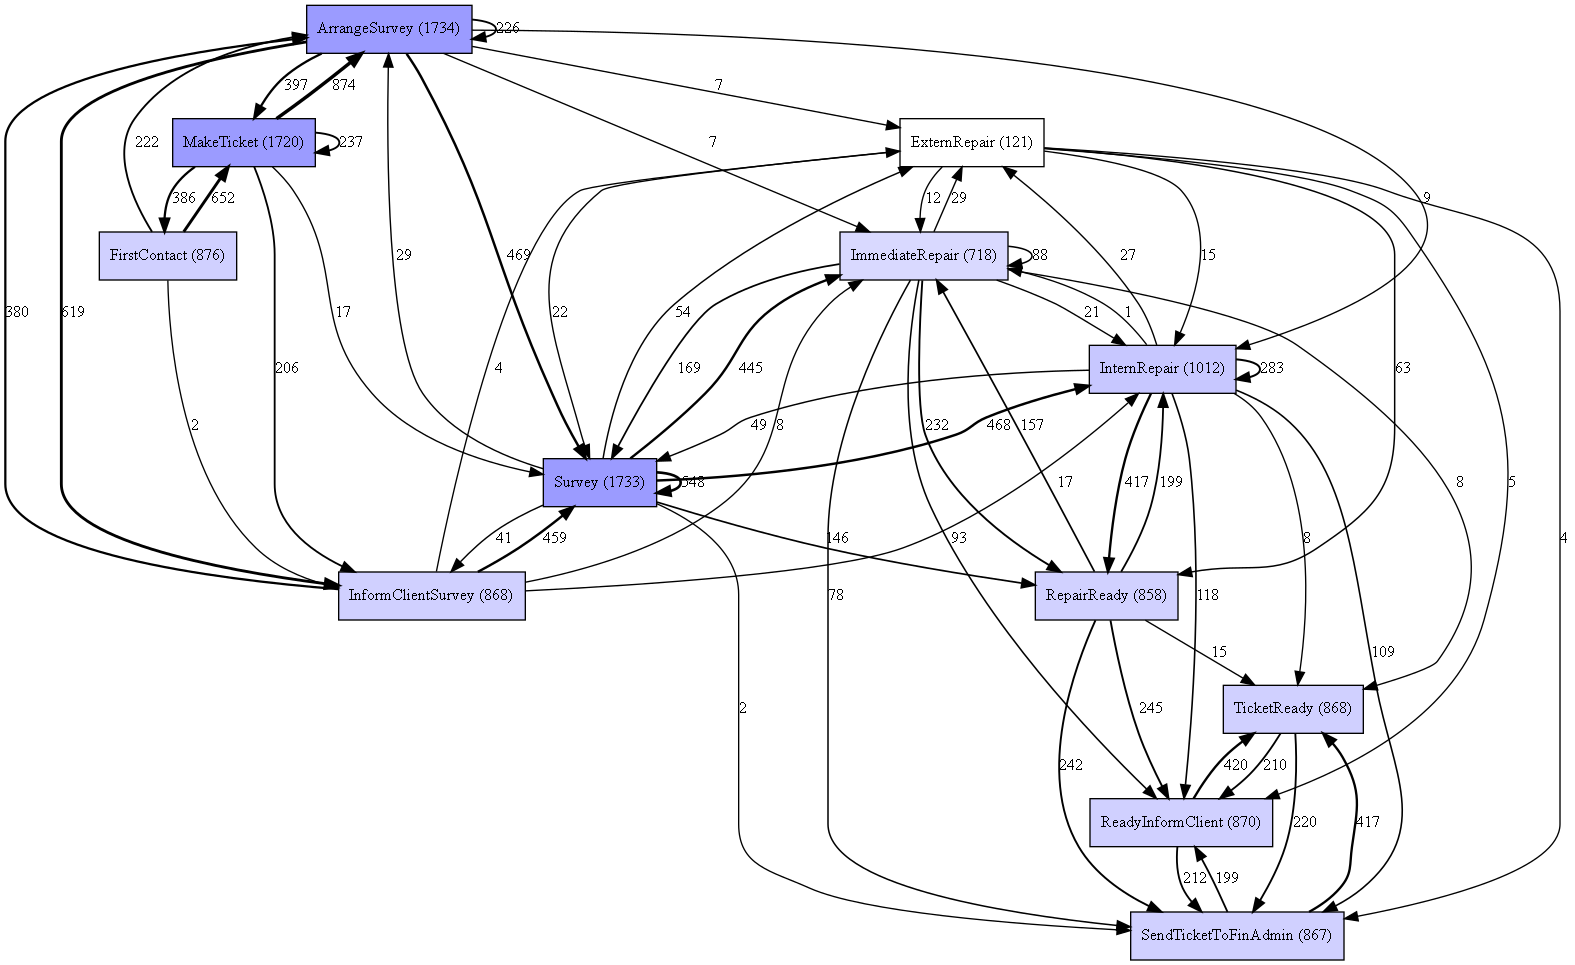

In [28]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py
# dataframe = pd.read_csv('./repair2.csv')
# #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
# dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

# event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']])
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

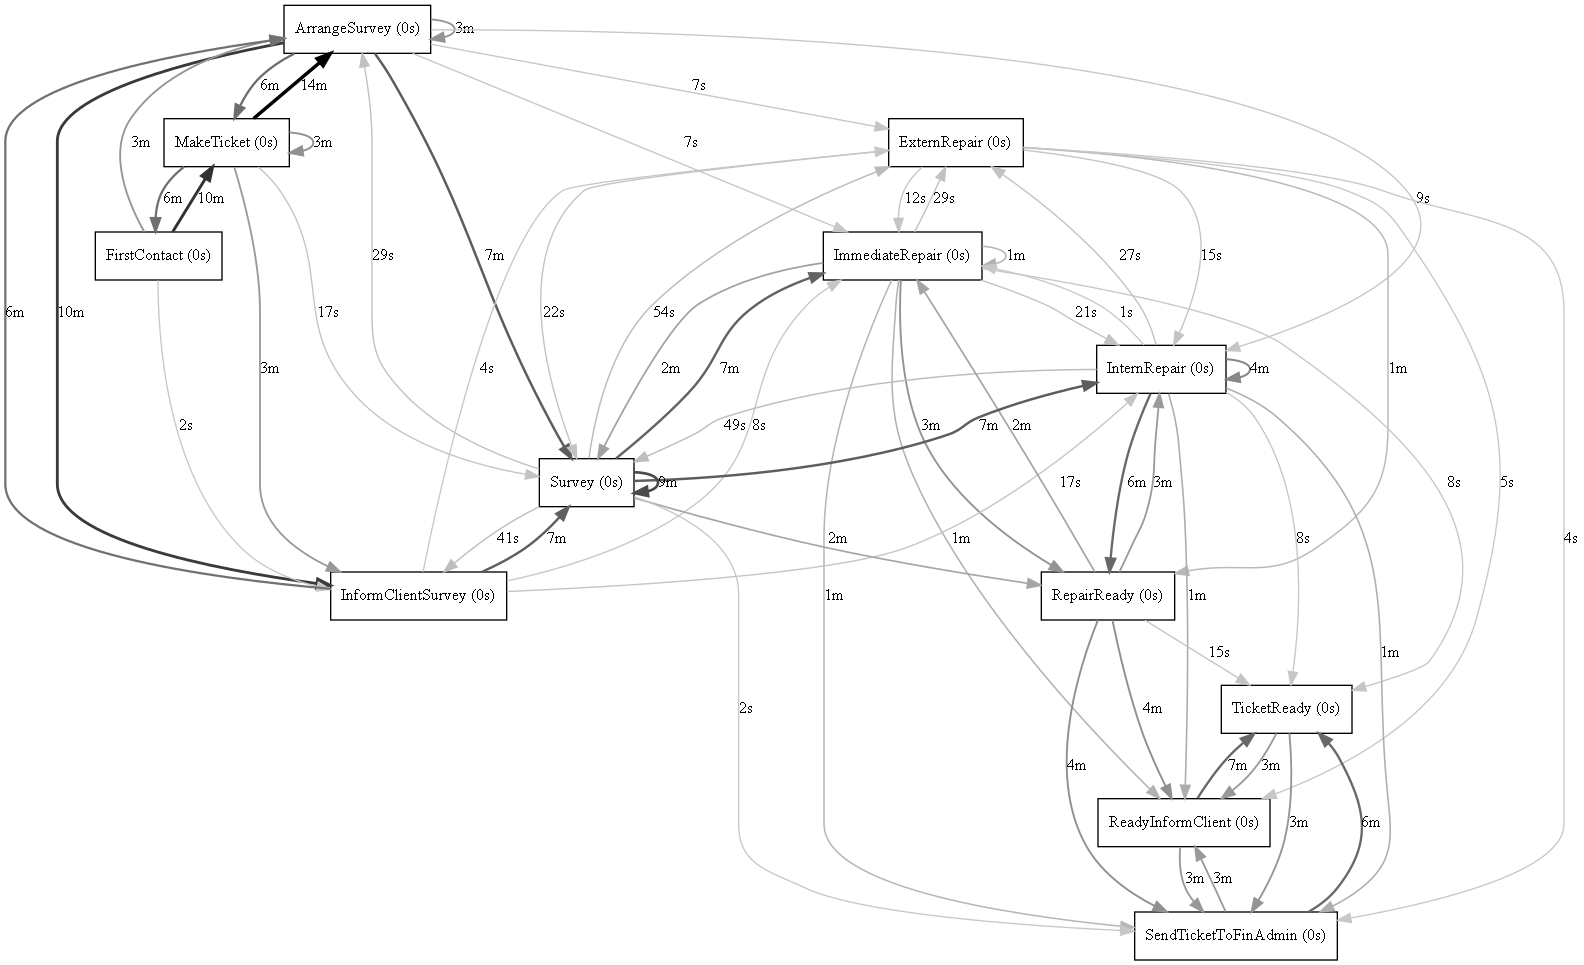

In [29]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py
# dataframe = pd.read_csv('./repair2.csv')
# #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
# dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

# event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']])
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

# EDA

In [30]:
using_case = list(set(log_target['caseID']))
ans = []
for i in using_case:
    sample = log_target[log_target['caseID'] == i]
    ans.append(sample.loc[:,'taskID'][sample['taskID'] == 'Survey'].count())

In [31]:
import collections
dict(collections.Counter(ans))

{2: 809, 1: 115, 0: 3}

In [32]:
# repOK case
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = df
# dataframe = pd.read_csv('./repair2.csv')

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    # dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    # merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = dataframe.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
#     if len(change) == 1:
#         continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
5903,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23,0:00
4035,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02,8:11
4561,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
5098,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:11
9171,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,18:34
8698,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,14:34
2987,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25
3604,1000,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20,2:25


In [33]:
tp = tp[tp['date'] > '2000-01-01']
tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 80 to 748
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               850 non-null    int64  
 1   taskID               850 non-null    object 
 2   originator           850 non-null    object 
 3   eventtype            850 non-null    object 
 4   contact              47 non-null     object 
 5   RepairType           74 non-null     object 
 6   objectKey            74 non-null     float64
 7   RepairInternally     58 non-null     object 
 8   EstimatedRepairTime  58 non-null     float64
 9   RepairCode           58 non-null     float64
 10  RepairOK             122 non-null    object 
 11  date                 850 non-null    object 
 12  time                 850 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 93.0+ KB


In [34]:
set(tp[tp['date'] > '2000-01-01']['taskID'])

{'ArrangeSurvey',
 'ExternRepair',
 'FirstContact',
 'ImmediateRepair',
 'InformClientSurvey',
 'InternRepair',
 'MakeTicket',
 'ReadyInformClient',
 'RepairReady',
 'SendTicketToFinAdmin',
 'Survey',
 'TicketReady'}

In [35]:
set(tp['originator'])

{'Anne',
 'Barbara',
 'Ben',
 'Cindy',
 'Dian',
 'DoIt',
 'Edd',
 'Eric',
 'FixIt',
 'Jacky',
 'John',
 'Lex',
 'Monica',
 'Nick',
 'Paul',
 'System'}

In [36]:
tp2 = df.loc[:,['caseID','taskID','date']].groupby(['date','taskID']).count()
tp2 = tp2.reset_index()
tp2 = tp2[tp2['date'] >= '2010-01-01']
tp2.groupby(['date','taskID']).max()

,,caseID
date,taskID,
2020-01-06,InformClientSurvey,1
2020-01-07,ArrangeSurvey,1
2020-01-08,ReadyInformClient,1
2020-01-09,Survey,1
2020-01-10,Survey,1
...,...,...
2022-05-10,InformClientSurvey,1
2022-05-11,TicketReady,1
2022-05-12,FirstContact,1


In [37]:
tp2['date'] = pd.to_datetime(tp2['date'])

Text(0.5, 1.0, 'Task Distribution')

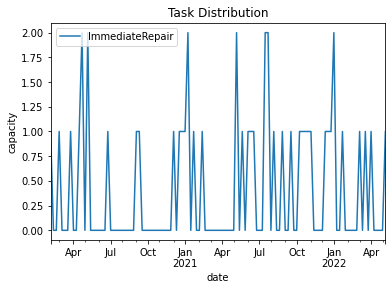

In [38]:
import matplotlib.pyplot as plt
name_list = list(set(tp2['taskID']))
name_list = ['ImmediateRepair']
for name in name_list:
    tp2[tp2['taskID'] == name].groupby([pd.Grouper(key='date', freq='1W')])['caseID'].count().plot()
plt.legend(name_list)
plt.ylabel('capacity')
plt.title('Task Distribution')

Text(0.5, 1.0, 'Capacity')

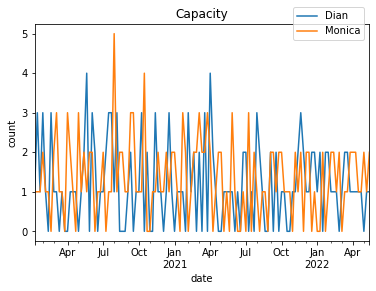

In [39]:
import matplotlib.pyplot as plt

tp2 = df.loc[:,['originator','caseID','date']].groupby(['date','originator']).mean().reset_index()
tp2['date'] = pd.to_datetime(tp2['date'])
target = tp2.groupby(['date','originator']).count().reset_index()
target = target[target['date'] >= '2010-01-01']

name_list = list(set(tp['originator']))
name_list = ['Dian','Monica']
for name in name_list:
    target[target['originator'] == name].groupby([pd.Grouper(key='date', freq='1W')])['caseID'].count().plot()
    
plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.ylabel('count')
plt.title('Capacity')

In [40]:
df1 = df.loc[:,['taskID','originator','caseID']].groupby(['originator','taskID']).count()
df1

caseID
originator taskID                        
Anne       ImmediateRepair            370
           InternRepair                60
           Survey                     435
Barbara    ImmediateRepair            176
           InternRepair                30
           Survey                     222
Ben        ImmediateRepair              8
           InternRepair                42
           Survey                      70
Cindy      InternRepair               200
           Survey                     188
Dian       ArrangeSurvey              877
           FirstContact               465
           InformClientWrongPlace      29
           MakeTicket                 874
DoIt       ExternRepair                66
Edd        InternRepair               210
           Survey                     162
Eric       ImmediateRepair              8
           InternRepair                44
           Survey                      46
FixIt      ExternRepair                66
Jacky      ImmediateRepair            184
           InternRepair                34
           Survey                     220
John       InternRepair               194
           Survey                     202
Lex        ImmediateRepair             14
           InternRepair                44
           Survey                      54
Monica     ArrangeSurvey              977
           FirstContact               534
           InformClientWrongPlace      44
           MakeTicket                 980
Nick       ImmediateRepair              6
           InternRepair                36
           Survey                      66
Paul       InternRepair               199
           Survey                     188
System     InformClientSurvey         926
           ReadyInformClient          927
           RepairReady                927
           SendTicketToFinAdmin       927
           TicketReady                927

In [41]:
df1 = df.loc[:,['taskID','originator','caseID']].groupby(['taskID','originator']).count()
df1

caseID
taskID                 originator        
ArrangeSurvey          Dian           877
                       Monica         977
ExternRepair           DoIt            66
                       FixIt           66
FirstContact           Dian           465
                       Monica         534
ImmediateRepair        Anne           370
                       Barbara        176
                       Ben              8
                       Eric             8
                       Jacky          184
                       Lex             14
                       Nick             6
InformClientSurvey     System         926
InformClientWrongPlace Dian            29
                       Monica          44
InternRepair           Anne            60
                       Barbara         30
                       Ben             42
                       Cindy          200
                       Edd            210
                       Eric            44
                       Jacky           34
                       John           194
                       Lex             44
                       Nick            36
                       Paul           199
MakeTicket             Dian           874
                       Monica         980
ReadyInformClient      System         927
RepairReady            System         927
SendTicketToFinAdmin   System         927
Survey                 Anne           435
                       Barbara        222
                       Ben             70
                       Cindy          188
                       Edd            162
                       Eric            46
                       Jacky          220
                       John           202
                       Lex             54
                       Nick            66
                       Paul           188
TicketReady            System         927

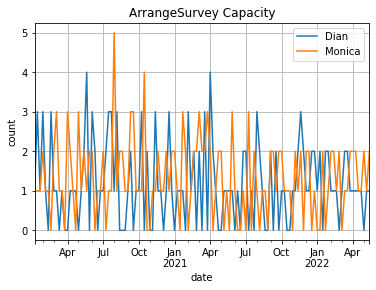

In [52]:
import matplotlib.pyplot as plt

tp2 = df.loc[:,['originator','caseID','date']].groupby(['date','originator']).mean().reset_index()
tp2['date'] = pd.to_datetime(tp2['date'])
target = tp2.groupby(['date','originator']).count().reset_index()
target = target[target['date'] >= '2010-01-01']

name_list = list(set(tp['originator']))
name_list = ['Dian','Monica']
for name in name_list:
    target[target['originator'] == name].groupby([pd.Grouper(key='date', freq='1W')])['caseID'].count().plot()
    
#plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.legend(name_list)
plt.ylabel('count')
plt.title('ArrangeSurvey Capacity')
plt.grid()

In [43]:
using_task = list(set(df['taskID']))
tar = df.loc[:,['caseID','taskID']].groupby('taskID').count().reset_index()
tar.sort_values('caseID',ascending=False)

,taskID,caseID
0,ArrangeSurvey,1854
7,MakeTicket,1854
11,Survey,1854
6,InternRepair,1094
2,FirstContact,999
8,ReadyInformClient,927
9,RepairReady,927
10,SendTicketToFinAdmin,927
12,TicketReady,927
4,InformClientSurvey,926


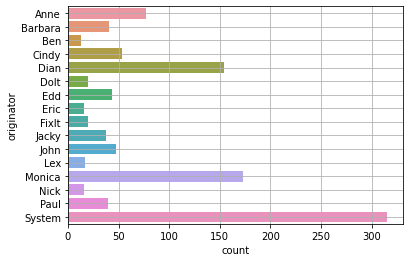

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
tp2 = tp2.sort_values('originator')
sns.countplot(y='originator',data=tp2)
plt.grid()